In [1]:
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
#print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Tensor Flow Version: 2.10.0

Python 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
import pickle
dict = pickle.load(open('california-housing-dataset.pkl', 'rb'))
x_train, y_train = dict['x_train'], dict['y_train']
x_test, y_test = dict['x_test'], dict['y_test']

print(x_train.shape, y_train.shape)
print(x_train[1,:], y_train[1])

(15480, 8) (15480,)
[   2.7639        9.            8.75862069    1.72413793   66.
    2.27586207   39.04       -122.69      ] 1.125


In [4]:
for i in range(8):
    x_train[:,i] = x_train[:,i]
    print(max(x_train[:,i]), min(x_train[:,i]))
print(max(y_train), min(y_train[:]))
    

15.0001 0.4999
52.0 1.0
141.9090909090909 0.8461538461538461
34.06666666666667 0.3333333333333333
35682.0 5.0
1243.3333333333333 0.6923076923076923
41.95 32.54
-114.31 -124.35
5.00001 0.14999


In [5]:
x_train_n = np.zeros((15480,8))

x_train_n[:,0] = x_train[:,0]/15.1
x_train_n[:,1] = x_train[:,1]/52
x_train_n[:,2] = x_train[:,2]/142
x_train_n[:,3] = x_train[:,3]/34.1
x_train_n[:,4] = x_train[:,4]/35682.0
x_train_n[:,5] = x_train[:,5]/1243.4
x_train_n[:,6] = (x_train[:,6]-32.5)/10
x_train_n[:,7] = (x_train[:,7]+124.4)/10.1

y_train_n= y_train[:]/5.1

In [6]:
for i in range(8):
    x_train_n[:,i] = x_train_n[:,i]
    print(max(x_train_n[:,i]), min(x_train_n[:,i]))
print(max(y_train_n), min(y_train_n))

0.9933841059602649 0.03310596026490066
1.0 0.019230769230769232
0.999359795134443 0.005958829902491874
0.9990224828934506 0.009775171065493644
1.0 0.00014012667451376043
0.9999463835719263 0.0005567859838408334
0.9450000000000003 0.003999999999999915
0.9990099009900993 0.004950495049506076
0.9803941176470589 0.029409803921568632


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
tf.random.set_seed(1234)

In [8]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=[8], activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(2, activation='elu'))
model.add(Dense(1, activation='elu'))

#model = load_model("models/full_20231018_adam")


model.summary()

model.compile(loss='mean_squared_error', 
              optimizer= tf.keras.optimizers.Adam(),  #"adam" 
              metrics=['mean_absolute_error','mean_absolute_percentage_error']
             )

# fit the keras model on the dataset

history = model.fit(x_train_n[:,:], #training data
                    y_train_n[:],  #Labels
                    epochs=200,
                    batch_size=128,
                    verbose=1,
                    validation_split = 0.1
                   )

model.save("model1_adam")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               3

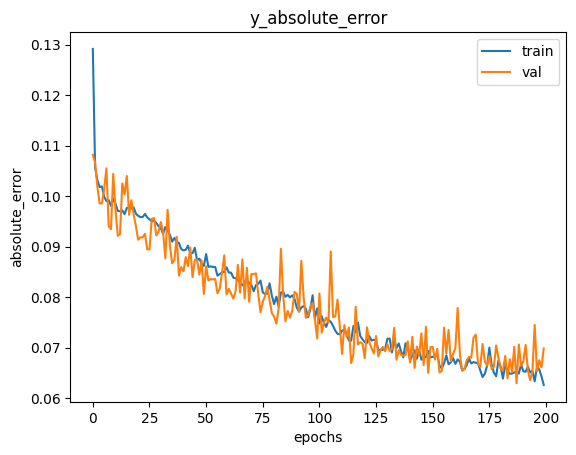

In [9]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('y_absolute_error')
plt.ylabel('absolute_error')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [10]:
labels_predicted = model.predict(x_train_n)
print(labels_predicted.shape)

484/484 [==============================] - 2s 4ms/step
(15480, 1)


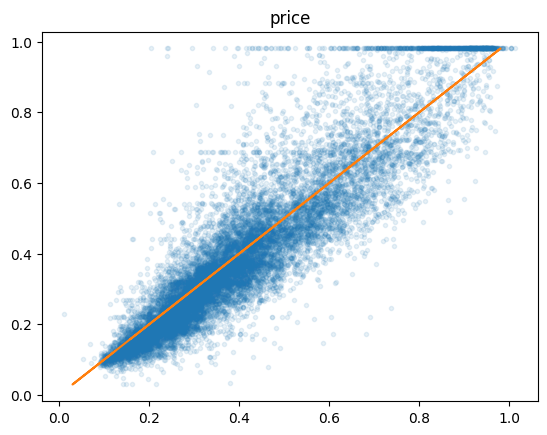

In [11]:
plt.plot(labels_predicted, y_train_n,'.', alpha =0.1)
plt.plot(y_train_n,y_train_n)
plt.title('price')
plt.show()

In [12]:
stop

NameError: name 'stop' is not defined

In [13]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=[8], activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(2, activation='elu'))
model.add(Dense(1, activation='elu'))

#model = load_model("models/full_20231018_adam")


model.summary()

model.compile(loss='mean_squared_error', 
              optimizer= tf.keras.optimizers.Adam(),  #"adam" 
              metrics=['mean_absolute_error','mean_absolute_percentage_error']
             )

# fit the keras model on the dataset

history = model.fit(x_train_n[:,:], #training data
                    y_train_n[:],  #Labels
                    epochs=200,
                    batch_size=128,
                    verbose=1,
                    validation_split = 0.1
                   )

model.save("model2_adam")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 16)                144       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                

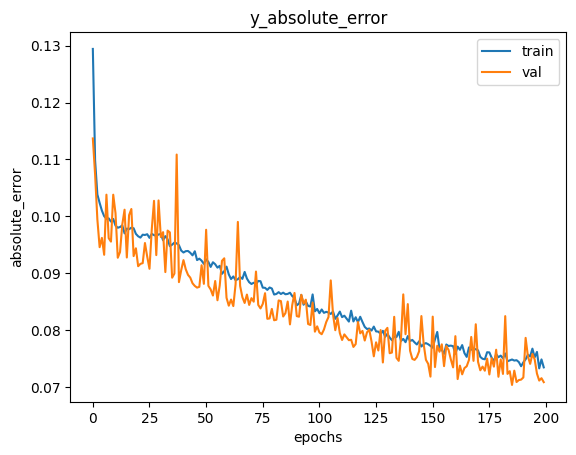

In [14]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('y_absolute_error')
plt.ylabel('absolute_error')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [15]:
labels_predicted = model.predict(x_train_n)
print(labels_predicted.shape)

484/484 [==============================] - 1s 2ms/step
(15480, 1)


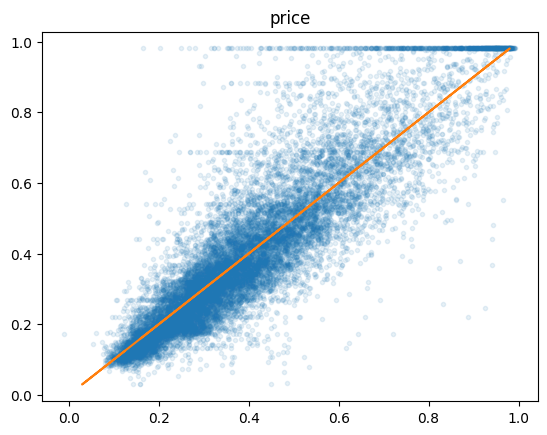

In [16]:
plt.plot(labels_predicted, y_train_n,'.', alpha =0.1)
plt.plot(y_train_n,y_train_n)
plt.title('price')
plt.show()

In [22]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=[8], activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(32, activation='elu'))
#model.add(Dense(64, activation='selu'))
#model.add(Dense(32, activation='selu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(2, activation='elu'))
model.add(Dense(1, activation='elu'))

#model = load_model("models/full_20231018_adam")


model.summary()

model.compile(loss='mean_squared_error', 
              optimizer= tf.keras.optimizers.Adam(),  #"adam" 
              metrics=['mean_absolute_error','mean_absolute_percentage_error']
             )

# fit the keras model on the dataset

history = model.fit(x_train_n[:,:], #training data
                    y_train_n[:],  #Labels
                    epochs=200,
                    batch_size=128,
                    verbose=1,
                    validation_split = 0.1
                   )

model.save("model2_adam")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 72        
                                                                 
 dense_53 (Dense)            (None, 16)                144       
                                                                 
 dense_54 (Dense)            (None, 32)                544       
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 dense_56 (Dense)            (None, 8)                 136       
                                                                 
 dense_57 (Dense)            (None, 4)                 36        
                                                                 
 dense_58 (Dense)            (None, 2)                

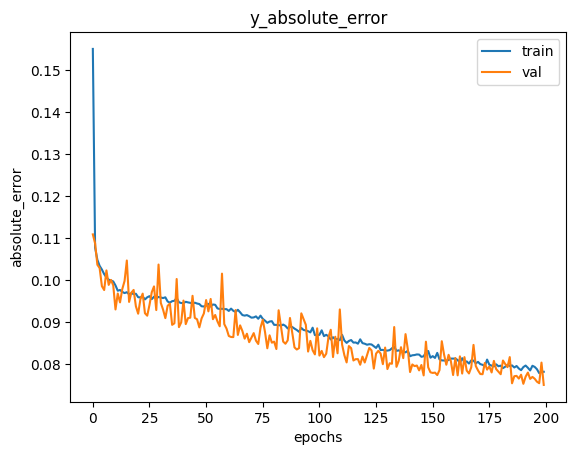

In [23]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('y_absolute_error')
plt.ylabel('absolute_error')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
labels_predicted = model.predict(x_train_n)
print(labels_predicted.shape)

484/484 [==============================] - 1s 2ms/step
(15480, 1)


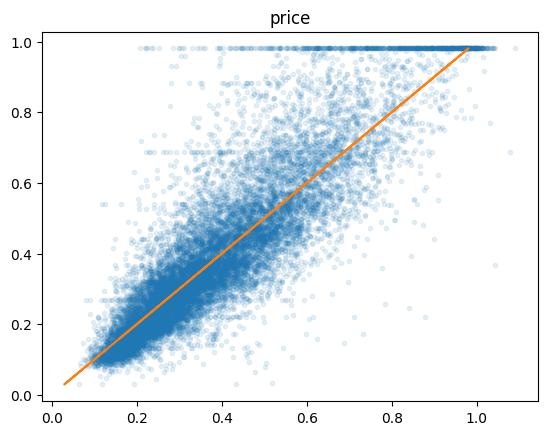

In [25]:
plt.plot(labels_predicted, y_train_n,'.', alpha =0.1)
plt.plot(y_train_n,y_train_n)
plt.title('price')
plt.show()

In [30]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=[8], activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(1024, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(2, activation='elu'))
model.add(Dense(1, activation='elu'))

#model = load_model("models/full_20231018_adam")


model.summary()

model.compile(loss='mean_squared_error', 
              optimizer= tf.keras.optimizers.Adam(),  #"adam" 
              metrics=['mean_absolute_error','mean_absolute_percentage_error']
             )

# fit the keras model on the dataset

history = model.fit(x_train_n[:,:], #training data
                    y_train_n[:],  #Labels
                    epochs=200,
                    batch_size=128,
                    verbose=1,
                    validation_split = 0.1
                   )

model.save("model2_adam")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 8)                 72        
                                                                 
 dense_81 (Dense)            (None, 16)                144       
                                                                 
 dense_82 (Dense)            (None, 32)                544       
                                                                 
 dense_83 (Dense)            (None, 64)                2112      
                                                                 
 dense_84 (Dense)            (None, 128)               8320      
                                                                 
 dense_85 (Dense)            (None, 256)               33024     
                                                                 
 dense_86 (Dense)            (None, 512)              

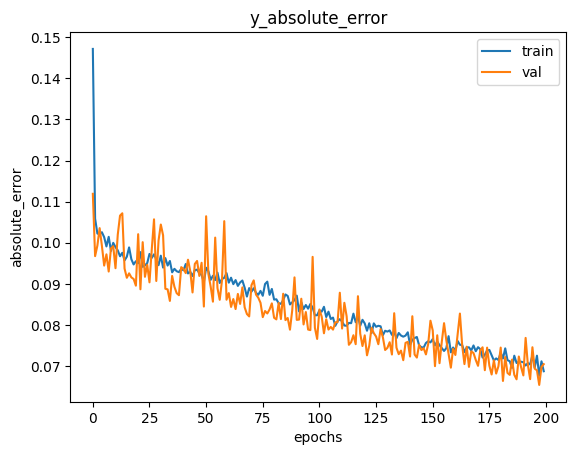

In [31]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('y_absolute_error')
plt.ylabel('absolute_error')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
labels_predicted = model.predict(x_train_n)
print(labels_predicted.shape)

484/484 [==============================] - 3s 5ms/step
(15480, 1)


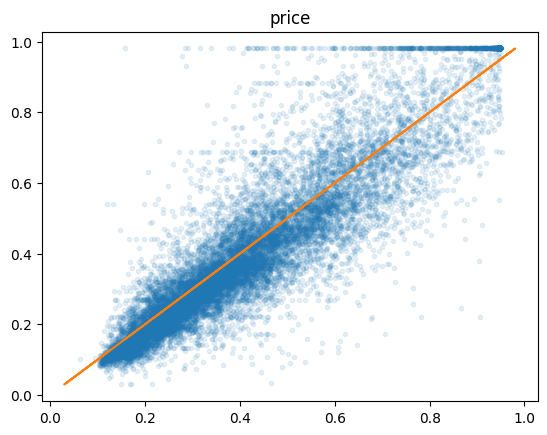

In [33]:
plt.plot(labels_predicted, y_train_n,'.', alpha =0.1)
plt.plot(y_train_n,y_train_n)
plt.title('price')
plt.show()